<a href="https://colab.research.google.com/github/somsirsa/Colab-Machine-Learning/blob/master/Linear%20Regression%20on%20synthetic%20data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Building recommendation system using MXNET

In [0]:
from __future__ import print_function
import mxnet as mx
from mxnet import nd, autograd, gluon
mx.random.seed(1)

In [0]:
data_ctx = mx.cpu()
model_ctx = mx.cpu()

In [0]:
num_inputs = 2
num_outputs = 1
num_examples = 10000

def real_fn(X):
    return 2 * X[:, 0] - 3.4 * X[:, 1] + 4.2

X = nd.random_normal(shape=(num_examples, num_inputs), ctx=data_ctx)
noise = .1 * nd.random_normal(shape=(num_examples,), ctx=data_ctx)
y = real_fn(X) + noise

In [15]:
print(X[0])
print(y[0])


[-0.6776515   0.10073948]
<NDArray 2 @cpu(0)>

[2.4451]
<NDArray 1 @cpu(0)>


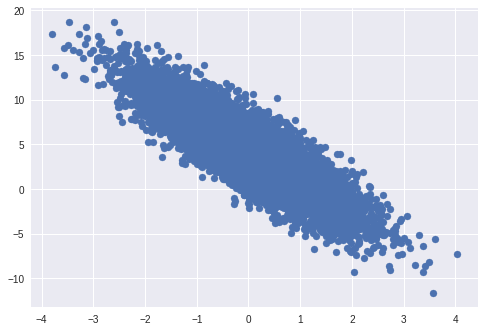

In [16]:

import matplotlib.pyplot as plt
plt.scatter(X[:, 1].asnumpy(),y.asnumpy())
plt.show()

In [0]:
batch_size = 4
train_data = gluon.data.DataLoader(gluon.data.ArrayDataset(X, y),
                                   batch_size=batch_size, shuffle=True)

In [20]:
for i, (data, label) in enumerate(train_data):
    print(data, label)
    break


[[ 0.27998534  0.90691674]
 [-1.2187992  -0.37136126]
 [-1.7014323  -1.2428706 ]
 [ 0.13421537 -3.4900203 ]]
<NDArray 4x2 @cpu(0)> 
[ 1.720399   3.0362916  5.0434985 16.118498 ]
<NDArray 4 @cpu(0)>


In [0]:
w = nd.random_normal(shape=(num_inputs, num_outputs), ctx=model_ctx)
b = nd.random_normal(shape=num_outputs, ctx=model_ctx)
params = [w, b]

In [0]:
for param in params:
    param.attach_grad()

In [0]:
def net(X):
    return mx.nd.dot(X, w) + b

In [0]:
def square_loss(yhat, y):
    return nd.mean((yhat - y) ** 2)

# New Section